In [51]:
import requests
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

### Load patent and classification information

In [2]:
def readTSV(fn):
    return (pd.DataFrame(pd.read_csv(fn, sep='\t')))

In [3]:
asg_df = readTSV('company_patent_info.tsv')

In [4]:
asg_df.dtypes

pid          int64
abstract    object
date        object
name        object
dtype: object

In [5]:
#different classification information
patent_wipo_df = readTSV('patent_wipo_label.tsv')
patent_nber_df = readTSV('patent_nber_label.tsv')

In [7]:
patent_nber_df.dtypes

pid       int64
title    object
dtype: object

In [8]:
#get classes for each company
total_df = asg_df.copy()
total_df = total_df.drop(columns=['abstract', 'date'], axis=1)

In [10]:
wipo_compl_df = total_df.merge(patent_wipo_df, on='pid', how='inner')
nber_compl_df = total_df.merge(patent_nber_df, on='pid', how='inner')

In [11]:
wipo_compl_df = wipo_compl_df.drop_duplicates()
nber_compl_df = nber_compl_df.drop_duplicates()

In [16]:
nber_compl_df.dtypes

pid       int64
name     object
title    object
dtype: object

In [24]:
asg_wipo_cnt_df = wipo_compl_df.groupby(['name', 'field_title']).count().reset_index()
asg_wipo_cnt_df = asg_wipo_cnt_df.drop(['sector_title'], axis =1)
asg_nber_cnt_df = nber_compl_df.groupby(['name', 'title']).count().reset_index()
asg_wipo_cnt_df.columns = ['name', 'cg', 'cnt']
asg_nber_cnt_df.columns = ['name', 'cg', 'cnt']

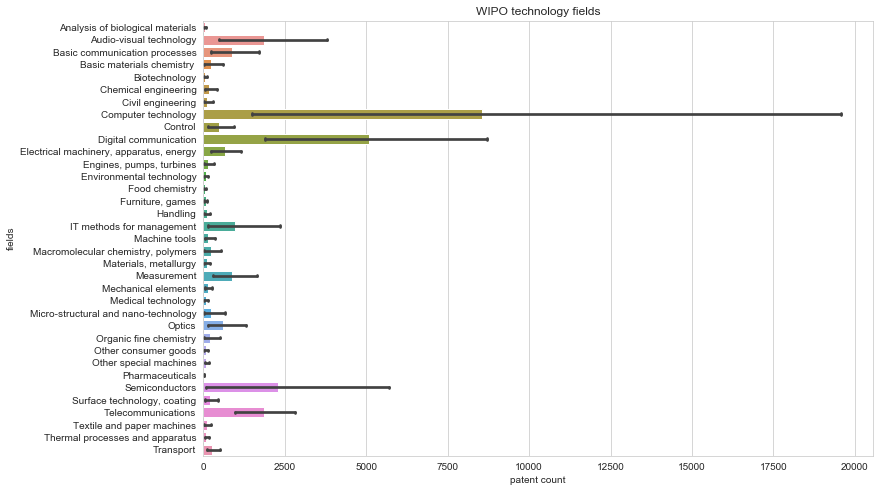

In [69]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='cnt', y ='cg', data=asg_wipo_cnt_df, capsize=0.1)
ax.set_title('WIPO technology fields')
ax.set(xlabel='patent count', ylabel='fields')
plt.show()

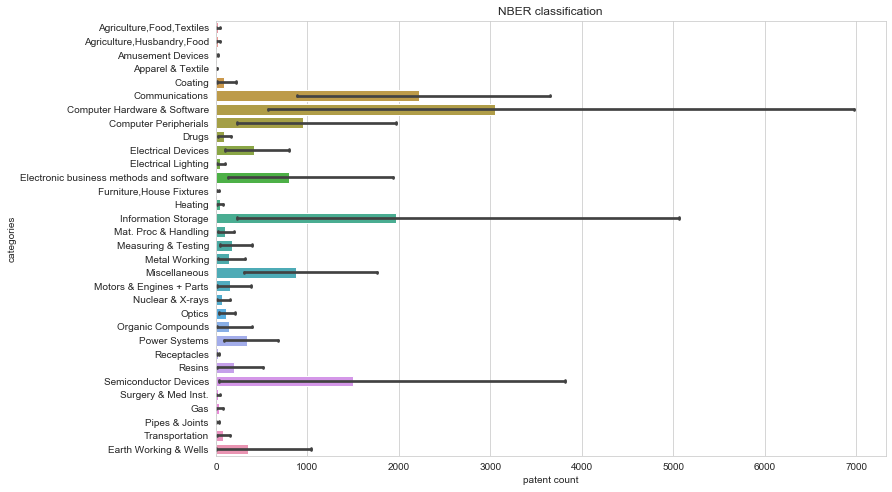

In [71]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='cnt', y ='cg', data=asg_nber_cnt_df, capsize=0.1)
ax.set_title('NBER classification')
ax.set(xlabel='patent count', ylabel='categories')
plt.show()

In [28]:
def convertMatrix(df):
    cnt_matrix = df.pivot('name', 'cg', 'cnt')
    company_list = list(cnt_matrix.index)
    company_index = dict(zip(company_list,range(len(company_list))))
    cnt_matrix = np.nan_to_num(cnt_matrix)
    return cnt_matrix, company_list

Use WIPO technology fields

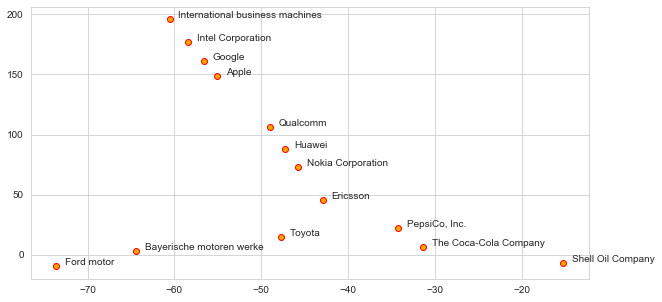

In [39]:
cnt_matrix, company_list = convertMatrix(asg_wipo_cnt_df)
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(cnt_matrix)
labels = company_list

plt.figure(figsize=(10, 5))
plt.scatter(result[:, 0], result[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, result[:, 0], result[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Use Nber classification

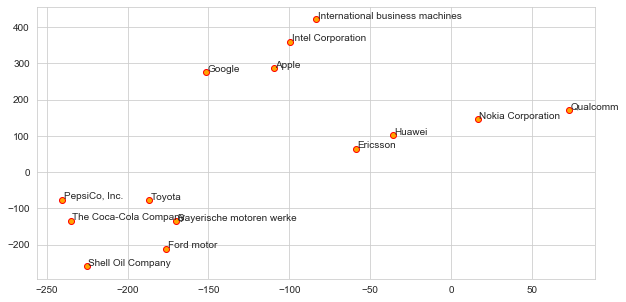

In [40]:
cnt_matrix, company_list = convertMatrix(asg_nber_cnt_df)
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
result = tsne.fit_transform(cnt_matrix)
labels = company_list

plt.figure(figsize=(10, 5))
plt.scatter(result[:, 0], result[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, result[:, 0], result[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

NBER classification condensed USPTO patent classification.
WIPO classification developed based on International patent classification, which is more technology-driven.